basics of pytorch, linear regression, logistic regression, ANN

# Basics of Pytorch

## Matrices
np.array와 torch.Tensor의 차이

In [1]:
import numpy as np

array = [[1,2,3], [4,5,6]]
first_array = np.array(array)

print("Array Type : {}".format(type(first_array)))
print("Array Shape : {}".format(np.shape(first_array)))
print(first_array)

Array Type : <class 'numpy.ndarray'>
Array Shape : (2, 3)
[[1 2 3]
 [4 5 6]]


In [2]:
import torch

# array = [[1,2,3], [4,5,6]]
tensor = torch.Tensor(array)
print("Array Type : {}".format(tensor.type))
print("Array Shape : {}".format(tensor.shape))
print(tensor)

Array Type : <built-in method type of Tensor object at 0x79d8fd904400>
Array Shape : torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [3]:
# 넘파이와 텐서의 ones

print("Numpy {}\n".format(np.ones((2,3))))
print(torch.ones(2,3))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [4]:
# 넘파이와 텐서의 random

print("Numpy {}\n".format(np.random.rand(2,3)))
print(torch.rand(2,3))

Numpy [[0.74001797 0.36904446 0.40146772]
 [0.08021862 0.6849988  0.6078359 ]]

tensor([[0.7852, 0.3653, 0.4718],
        [0.2468, 0.9795, 0.1295]])


In [5]:
# 넘파이와 텐서 변환

array = np.random.rand(2,2)
print("{} {}\n".format(type(array), array))

# numpy > tensor
from_numpy_to_tensor = torch.from_numpy(array)
print("from np to tensor")
print("{}\n".format(from_numpy_to_tensor))

# tensor > numpy
tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("from tensor to np")
print("{} {}\n".format(type(from_tensor_to_numpy), type(from_numpy_to_tensor)))

<class 'numpy.ndarray'> [[0.13593953 0.17392057]
 [0.32042065 0.68430643]]

from np to tensor
tensor([[0.1359, 0.1739],
        [0.3204, 0.6843]], dtype=torch.float64)

from tensor to np
<class 'numpy.ndarray'> <class 'torch.Tensor'>



## Basic Math w Pytorch

In [6]:
tensor = torch.ones(3,3)
print(tensor)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [7]:
# resize
print(tensor.view(9).shape)
print(tensor.view(9))

torch.Size([9])
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])


In [8]:
# addition
print("Addition \n{}".format(torch.add(tensor, tensor)))

Addition 
tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])


In [9]:
# subtraction
print("Subtraction \n{}".format(tensor.sub(tensor)))

Subtraction 
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [10]:
# element-wise multiplication
print("Element-Wise Multiplication \n{}".format(torch.mul(tensor, tensor)))

Element-Wise Multiplication 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [11]:
# element-wise division
print("Element-Wise Division \n{}".format(torch.div(tensor, tensor)))

Element-Wise Division 
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [12]:
print("Mean : {}".format(tensor.mean()))    # mean
print("Std : {}".format(tensor.std()))      # std

Mean : 1.0
Std : 0.0


## Variable
- Difference between variables and tensor is variable accumulates gradients
- In order to make back prop we need variables

In [13]:
from torch.autograd import Variable
var = Variable(torch.ones(3), requires_grad=True)
var

tensor([1., 1., 1.], requires_grad=True)

$y = x^2$
- define x=[2,4]
- find y=[4,16]

In [14]:
# define x
array = [2,4]
tensor = torch.Tensor(array)

x = Variable(tensor, requires_grad=True)
y = x**2

print('y = ', y)

y =  tensor([ 4., 16.], grad_fn=<PowBackward0>)


In [15]:
o = (1/2)*sum(y)
print('o = ', o)

o =  tensor(10., grad_fn=<MulBackward0>)


In [16]:
o.backward() # calculates gradients
print('gradients : ', x.grad)

gradients :  tensor([2., 4.])


## Linear Regression

In [17]:
car_prices_array = [3,4,5,6,7,8,9]
car_prices_np = np.array(car_prices_array, dtype=np.float32)
car_prices_np = car_prices_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_prices_np))

In [18]:
num_of_car_sell_array = [ 7.5, 7., 6.5, 6., 5.5, 5., 4.5]
num_of_car_sell_np = np.array(num_of_car_sell_array, dtype=np.float32)
num_of_car_sell_np = num_of_car_sell_np.reshape(-1,1)
num_of_car_sell_tensor = Variable(torch.from_numpy(num_of_car_sell_np))

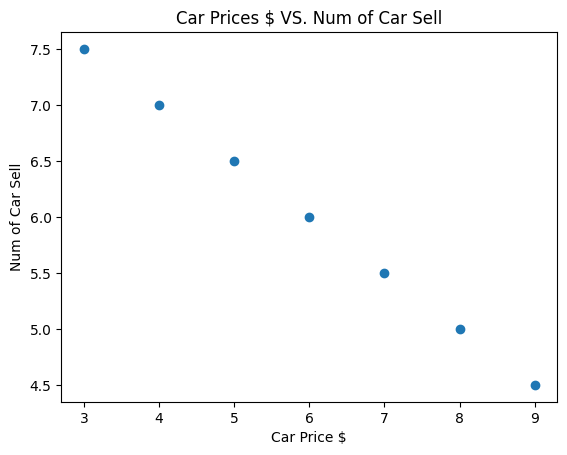

In [19]:
import matplotlib.pyplot as plt

plt.scatter(car_prices_array, num_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Num of Car Sell")
plt.title("Car Prices $ VS. Num of Car Sell")
plt.show()

Linear Regression with Pytorch

In [20]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings('ignore')

In [21]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

In [22]:
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

mse = nn.MSELoss()

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epoch 0, loss 10.514286994934082
epoch 50, loss 6.262673854827881
epoch 100, loss 4.2319512367248535
epoch 150, loss 2.8597071170806885
epoch 200, loss 1.9324252605438232
epoch 250, loss 1.3058208227157593
epoch 300, loss 0.8823986053466797
epoch 350, loss 0.5962740778923035
epoch 400, loss 0.4029276967048645
epoch 450, loss 0.2722751498222351
epoch 500, loss 0.1839876025915146
epoch 550, loss 0.12432799488306046
epoch 600, loss 0.08401361852884293
epoch 650, loss 0.05677150562405586
epoch 700, loss 0.038363195955753326
epoch 750, loss 0.025923749431967735
epoch 800, loss 0.017518039792776108
epoch 850, loss 0.011837847530841827
epoch 900, loss 0.007999233901500702
epoch 950, loss 0.005405473988503218
epoch 1000, loss 0.003652736311778426


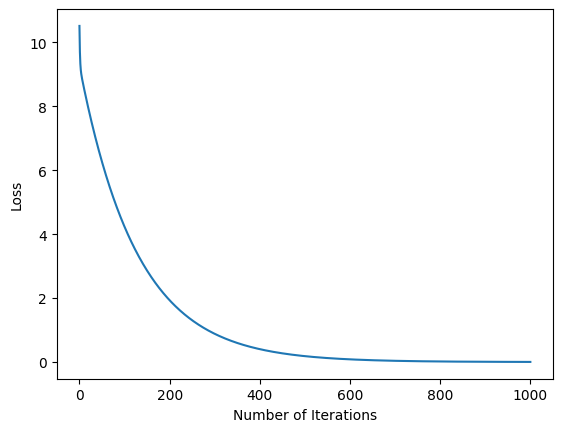

In [23]:
loss_list = []
iteration_num = 1001

for iteration in range(iteration_num):
    optimizer.zero_grad()

    results = model(car_price_tensor)
    loss = mse(results, num_of_car_sell_tensor)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.data)

    if (iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

plt.plot(range(iteration_num), loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

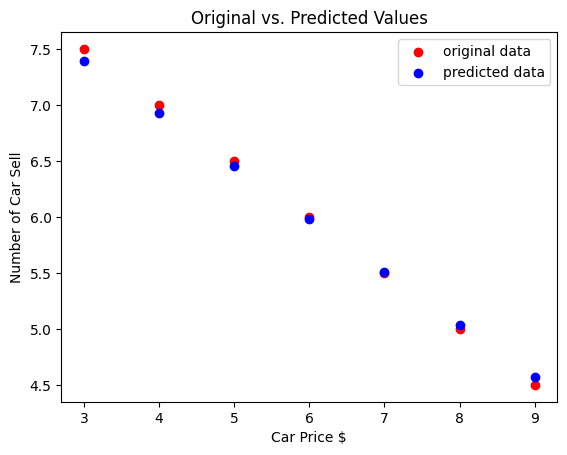

In [24]:
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, num_of_car_sell_array, label='original data', color='r')
plt.scatter(car_prices_array, predicted, label='predicted data', color='b')

plt.legend()
plt.xlabel('Car Price $')
plt.ylabel('Number of Car Sell')
plt.title('Original vs. Predicted Values')
plt.show()

## Logistic Regression

In [25]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

In [26]:
train = pd.read_csv('train.csv', dtype = np.float32)

targets_numpy = train.label.values
features_numpy = train.loc[:, train.columns != 'label'].values/255

features_train, features_test, targets_train, targets_test = train_test_split(features_numpy, targets_numpy, test_size = 0.2, random_state = 42)

featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

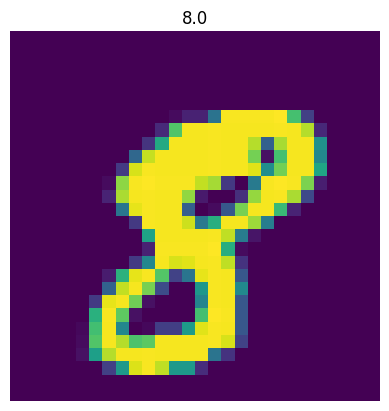

In [27]:
batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(featuresTrain,targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest,targetsTest)

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [28]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)
error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [29]:
count = 0
loss_list = []
iteration_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()

        count += 1

        if count % 50 == 0:
            correct = 0
            total = 0

            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))
                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]

                total += len(labels)
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            loss_list.append(loss.data)
            iteration_list.append(count)

        if count % 500 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 1000  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 1500  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 2000  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 2500  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 3000  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 3500  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 4000  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 4500  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 5000  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 5500  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 6000  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 6500  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 7000  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 7500  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 8000  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 8500  Loss: nan  Accuracy: 8.551483154296875%
Iteration: 9000  Loss: nan  Accu

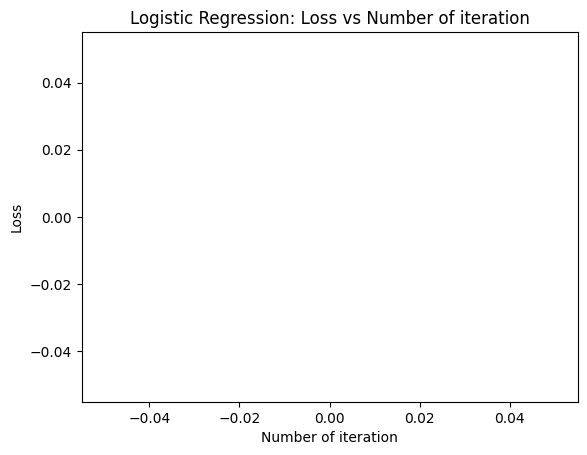

In [30]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

## ANN

In [31]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [32]:
class ANNModel(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()

        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.tanh2 = nn.Tanh()
        self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        self.elu3 = nn.ELU()
        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.tanh2(out)
        out = self.fc3(out)
        out = self.elu3(out)
        out = self.fc4(out)
        return out

input_dim = 28*28
hidden_dim = 150
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)
error = nn.CrossEntropyLoss()

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [33]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        optimizer.zero_grad()
        outputs = model(train)
        loss = error(outputs, labels)
        loss.backward()
        optimizer.step()

        count += 1

        if count % 50 == 0:
            correct = 0
            total = 0

            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))

                outputs = model(test)
                predicted = torch.max(outputs.data, 1)[1]

                total += len(labels)
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:
            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 1000  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 1500  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 2000  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 2500  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 3000  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 3500  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 4000  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 4500  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 5000  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 5500  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 6000  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 6500  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 7000  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 7500  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 8000  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 8500  Loss: nan  Accuracy: 8.551483154296875 %
Iteration: 9000

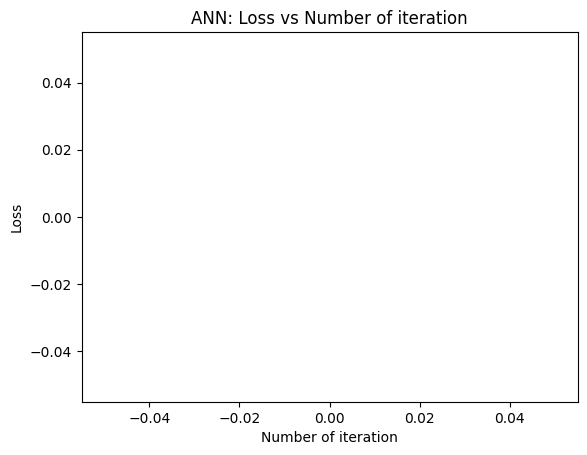

In [36]:
# visualization loss
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

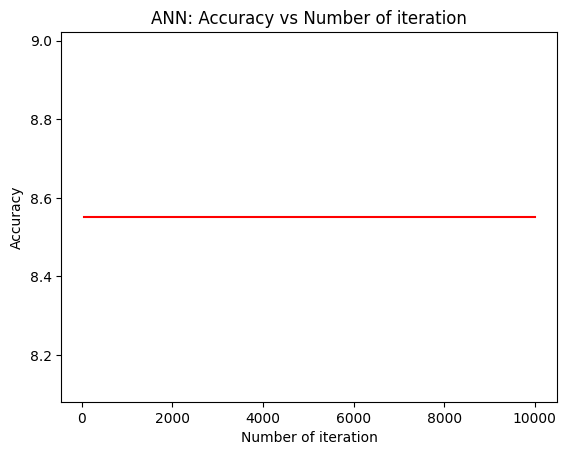

In [37]:
# visualization accuracy
plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()